In [1]:
from ServiceNowData import ServiceNowHTTPXClient

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
#client = ServiceNowHTTPXClient()
#response = client.healthCheck() # always run to make sure the instance is awake

In [3]:
# grab our major incident data
"""response = client.getData('incident','major_incident_state=accepted', {
    'sysparm_display_value':True,
    'sysparm_exclude_reference_link':True,
    'sysparm_fields':'number,resolved_by,short_description,description,priority,impact,urgency,closed_by,close_notes,state,category,major_incident_state'
    })"""

#data = response.json()['result']
#df = pd.DataFrame(data)
#df.head(5)

"response = client.getData('incident','major_incident_state=accepted', {\n    'sysparm_display_value':True,\n    'sysparm_exclude_reference_link':True,\n    'sysparm_fields':'number,resolved_by,short_description,description,priority,impact,urgency,closed_by,close_notes,state,category,major_incident_state'\n    })"

In [4]:
rate = 20 # average number of events per year
size = 20
# stable, shift, breakdown

z = np.random.exponential(1./rate, size=size)*365
print(f'mean: {np.mean(z)}')
print(f'max: {np.max(z)}')
print(f'min: {np.min(z)}')
print(f'std: {np.std(z)}')
df = pd.Timestamp('today').normalize() - pd.to_timedelta(24*60*60*np.cumsum(z), unit='s')
df

mean: 17.6913887147621
max: 47.601765183988384
min: 2.076341709918903
std: 13.784973727801129


DatetimeIndex(['2023-05-12 10:10:51.749045603',
               '2023-05-10 08:20:55.825308610',
               '2023-04-28 00:40:27.770875136',
               '2023-04-01 04:07:20.199627236',
               '2023-03-17 14:16:49.251044226',
               '2023-03-10 11:10:43.673528572',
               '2023-03-08 08:51:06.446982500',
               '2023-02-10 16:30:01.439781858',
               '2023-01-06 03:34:01.939485846',
               '2023-01-02 13:37:36.217542041',
               '2022-12-29 15:51:35.355743738',
               '2022-12-18 14:25:00.076468660',
               '2022-10-31 23:58:27.564572062',
               '2022-10-04 03:53:16.895825975',
               '2022-09-29 04:13:53.806432858',
               '2022-09-18 22:54:26.417064279',
               '2022-08-13 12:07:24.095033415',
               '2022-07-01 20:01:51.428443510',
               '2022-06-16 08:50:03.683151502',
               '2022-06-05 04:08:00.300891094'],
              dtype='datetime64[ns]', f

<Axes: >

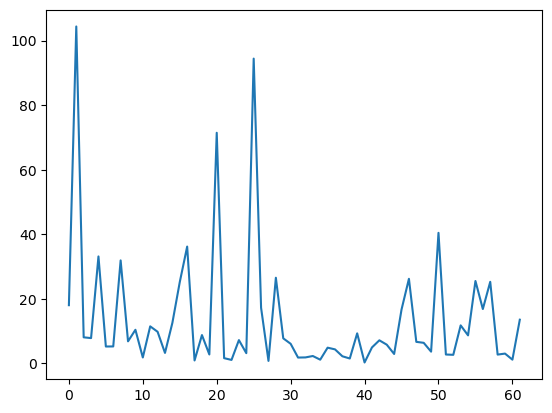

In [5]:
rates = [20,  5, 20, 80, 20]
sizes = [20,  2, 10, 10, 20]

from ServiceNowFaker import simulateArrivals
from datetime import datetime

arrivalDF = pd.DataFrame(simulateArrivals(rates, sizes))
arrivalDF = arrivalDF.rename(columns={0: "Opened"})
arrivalDF['Delta'] = -arrivalDF["Opened"].diff()
arrivalDF.loc[0,'Delta'] = datetime.today()-arrivalDF.iloc[0]['Opened'] # time difference from today

# reversing the data doesn't seem to change the chart.
display(((arrivalDF)['Delta'].astype('timedelta64[s]')/(24*60*60)).plot.line()) 

In [6]:
display(arrivalDF)

,Opened,Delta
0,2023-05-07 12:03:18.066589506,18 days 00:49:51.595999494
1,2023-01-23 03:36:41.718727214,104 days 08:26:36.347862292
2,2023-01-15 01:37:58.314345382,8 days 01:58:43.404381832
3,2023-01-07 05:18:30.907909662,7 days 20:19:27.406435720
4,2022-12-05 02:07:56.316211650,33 days 03:10:34.591698012
...,...,...
57,2021-02-19 04:40:51.505339339,25 days 06:37:46.621244550
58,2021-02-16 11:01:01.567942411,2 days 17:39:49.937396928
59,2021-02-13 09:54:19.140805066,3 days 01:06:42.427137345
60,2021-02-12 05:55:24.706639856,1 days 03:58:54.434165210


In [7]:
from ServiceNowFaker import generateMajorIncident

indexLength = len(arrivalDF.index)
for index, row in arrivalDF.iterrows():
    # "2017-09-15 22:41:36"
    print(generateMajorIncident(index, indexLength, row['Opened']))
    break


NameError: name 'numbersLength' is not defined